In [2]:
import sys
import os

# 将项目根目录添加到 sys.path
# 假设当前笔记本在 app/graphs/ 目录下，项目根目录在 ../../
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

print(f"Project root added: {project_root}")

Project root added: d:\code\Agent_Trae\Agent


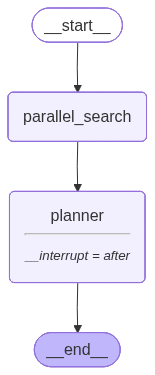

In [3]:
# 构建图结构

from IPython.display import Image, display
from langgraph.graph import START, END, StateGraph
from langgraph.checkpoint.memory import MemorySaver
from app.graphs.state import AgentState
from app.graphs.node import (
    parallel_search_node,
    itinerary_planning_node
)

# 初始化图构建器
builder = StateGraph(AgentState)

# 添加节点
builder.add_node("parallel_search", parallel_search_node)
builder.add_node("planner", itinerary_planning_node)

# 添加边
# 开始 -> 并行搜索
builder.add_edge(START, "parallel_search")

# 并行搜索 -> 规划师
builder.add_edge("parallel_search", "planner")

# 规划师 -> 结束
# 这里我们不设置自动循环，用户如果不满意，可以通过发送新消息来触发新的运行
builder.add_edge("planner", END)

# 设置记忆检查点，支持 Human-in-the-loop
memory = MemorySaver()

# 编译图
# interrupt_after=["planner"] 可以让程序在规划完成后暂停，等待用户确认或干预
graph = builder.compile(checkpointer=memory, interrupt_after=["planner"])

# 可视化（如果在 Jupyter 环境中）
try:
    display(Image(graph.get_graph(xray=1).draw_mermaid_png()))
except:
    pass


In [4]:

# 测试
from langchain_core.messages import HumanMessage
input_message = HumanMessage(content="我想在湖南找一个天气好的景点和酒店")
config = {"configurable": {"thread_id": "1"}}
async for event in graph.astream({"messages":input_message,}, config, stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='我想在湖南找一个天气好的景点和酒店', additional_kwargs={}, response_metadata={}, id='b488c25b-d1ae-414d-9c7b-388d4e035553')]}
{'messages': [HumanMessage(content='我想在湖南找一个天气好的景点和酒店', additional_kwargs={}, response_metadata={}, id='b488c25b-d1ae-414d-9c7b-388d4e035553')], 'attraction_info': '[{\'type\': \'text\', \'text\': \'{\\n  "city": "湖南省",\\n  "forecasts": [\\n    {\\n      "date": "2026-01-16",\\n      "week": "5",\\n      "dayweather": "多云",\\n      "nightweather": "小雨",\\n      "daytemp": "19",\\n      "nighttemp": "12",\\n      "daywind": "南",\\n      "nightwind": "南",\\n      "daypower": "1-3",\\n      "nightpower": "1-3",\\n      "daytemp_float": "19.0",\\n      "nighttemp_float": "12.0"\\n    },\\n    {\\n      "date": "2026-01-17",\\n      "week": "6",\\n      "dayweather": "小雨",\\n      "nightweather": "多云",\\n      "daytemp": "15",\\n      "nighttemp": "8",\\n      "daywind": "北",\\n      "nightwind": "北",\\n      "daypower": "1-3",\\n      "nightpower"